In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

# Exercise 5.1: Gaussian random walk

A Gaussian random walk can be represented as a sum of independent Gaussian variables $X_i\sim\mathcal{N}(0,1)$:

$$S_n = \sum_{i=1}^n X_i$$

**a)** Generate $n=1000$ independent draws from the standard Gaussian distribution and plot a random walk that they create.

Text(0, 0.5, '$S_n$')

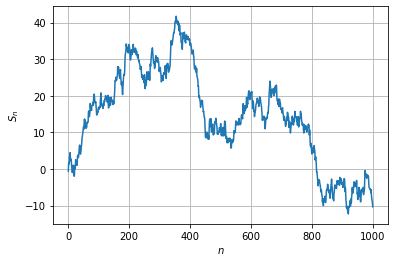

In [2]:
n = 1000

X = np.random.normal(size=n) 
walk = np.cumsum(X,axis=0) # np.cumsum returns a cummulative sum of numpy array over a given axis

plt.plot(walk) # generate a line plot

plt.grid() # add grid to the plot
plt.xlabel("$n$") # add label of x axis
plt.ylabel("$S_n$") # add label of y axis

**b)** Plot many (e.g. 100) independent Gaussian random walks in the same plot using only one color. You can decrease the line widths and increase the plot size to increase readability of your graph. Notice that the standart deviation of $S_n$ is given by $\sqrt{n}$. Plot curves $3\sqrt{n}$ and $-3\sqrt{n}$ using a different color on the same plot. What do you observe?

Text(0, 0.5, '$S_n$')

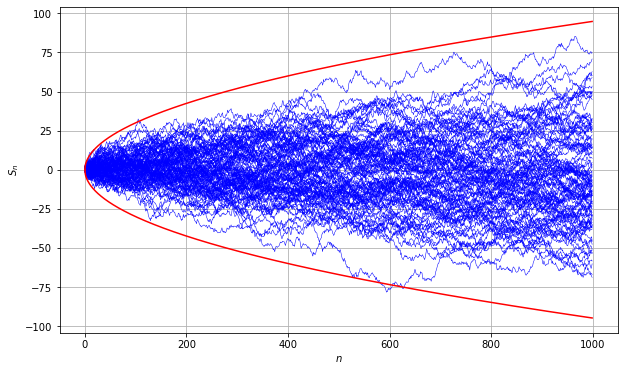

In [8]:
fig, ax = plt.subplots(figsize=(10,6)) # set figure size to (10,5)

n = 1000

for _ in range(100):
    X = np.random.normal(size=n)
    walk = np.cumsum(X,axis=0)
    plt.plot(walk, color='b', linewidth=0.5) # specify color and line width 
    
plt.grid() 

plt.plot(3*np.sqrt(np.arange(n)), color='r')
plt.plot(-3*np.sqrt(np.arange(n)), color='r')

plt.xlabel("$n$") 
plt.ylabel("$S_n$") 

# Exercise 5.2: Bifurcation diagram 

The *logistic map* generates a sequence $\{x_n\}$ using the following relation:

$$x_{n+1} = r x_n(1-x_n),$$

where $r$ is a postive constant and $x_0\in(0,1)$. The goal of this task is to build the *bifurcation diagram* of this map as a function of $r$ (also called the bifurcation parameter). 

To get motivated, you can check out [this great Veritasium video](https://www.youtube.com/watch?v=ovJcsL7vyrk). 

**a)** Write a function that calculates the first $n$ members of the logistic map sequence, given $x_0$, $r$ and $n$.

In [4]:
def logistic_map(r,x0,n):
    x = [x0]
    for i in range(n):
        x.append(r*x[-1]*(1.-x[-1])) 
    return x

**b)** Plot the first 100 elements of the sequence for several values of $r$, e.g. $r\in\{1.0,2.5,3.0\}$, as a line plot (```plt.plot()```). You can try different values of $x_0$. What do you observe?

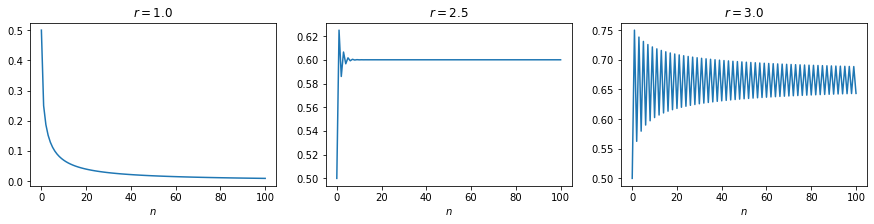

In [5]:
# We generate a plot with three subplots (one row and three columns)
fig, ax = plt.subplots(1,3, figsize=(15,3)) 

rs = [1.0,2.5,3.0]
n = 100

for ax_,r in zip(ax,rs): # iterate over axis (subplots) and rs
    ax_.plot(logistic_map(r,0.5,n))
    ax_.set_title("$r=$"+str(r)) # notice that plt.title but ax.set_title
    ax_.set_xlabel("$n$")     # notice that plt.xlabel but ax.set_xlabel

**c)** Now we finally plot the well-known [bifurcation diagram](https://en.wikipedia.org/wiki/Bifurcation_diagram). For values of $r$ between $0$ and $4$ with step $0.01$, calculate the first $n=1000$ elements of the sequence $\{x_n\}$. For each value of $r$, plot the last $100$ points as a scatter plot (```plt.scatter()```), so that only point and no connecting lines are displayed. 

Text(0.5, 0, '$r$')

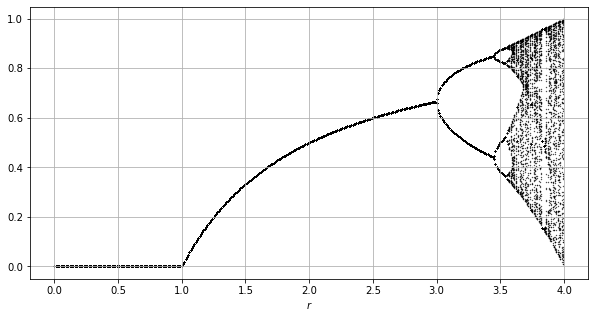

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

k = 100

for r in np.arange(0,4,0.01):
    points = logistic_map(r,0.5,1000)
    # We plot 100 points for the same value of r, so we use [r]*100 for the x axis
    plt.scatter([r]*k,points[-k:],s=0.1,color='black') # specify color and marker size (s)

plt.grid()

plt.xlabel("$r$")

# Exercise 5.3: Wigner semicircle distribution

Generate a symmetric matrix with random, standard normally distributed entries and plot their eigenvalues in a histogram. You can use ```plt.hist()``` function for histogram and ```np.linalg.eigvalsh``` function to find eigenvalues of a symmetric matrix.

Try different sizes of the matrix and observe how the eigenvalues' distribution changes. 

(0.0, 100.0)

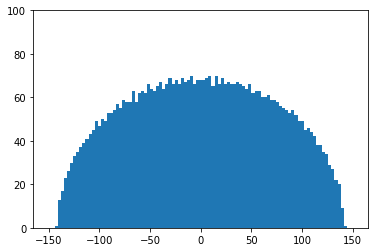

In [7]:
n = 5000

# We generate a symmetric matrix as a sum of a radnom matrix M and M.T
# To keep the variance equal to 1, we normalize by sqrt(2)
mat_normal = np.random.standard_normal((n,n))
mat = (mat_normal + mat_normal.T)/ np.sqrt(2)
    
plt.hist(np.linalg.eigvalsh(mat), bins=np.linspace(-150,150,100))
plt.ylim(0,100)